# Importing Necessary Libraries

In [12]:
%matplotlib inline

import os
import shutil
import random

import numpy as np
import cv2

from PIL import Image, ImageOps
from matplotlib import pyplot as plt


import time


# Resizing and Loading Images From Directory where Images are stored

In [24]:
img_size = 224
def data_load(paths):
    temp = []
    for img in os.listdir(paths):
        img_array = cv2.imread(os.path.join(path,img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        new_array = cv2.resize(img_array, (img_size, img_size))
        temp.append([new_array])
    return temp    

In [66]:
path = 'C:/Users/KIIT/Images/Severe'
data = data_load(path)

In [67]:
print(len(data))

772


In [68]:
data_arr = np.array(data)

In [69]:
# Reshaping array to Batch first and channel last format
data_arr_copy = np.array(data_arr).reshape(-1,224,224,3)

In [29]:
data_arr_copy.shape

(772, 224, 224, 3)

# Performing Augmentations And Increasing the sharpness of the image

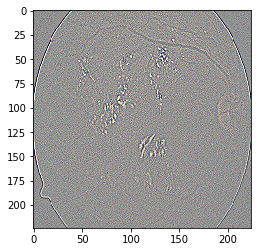

In [22]:
img = cv2.imread('C:/Users/KIIT/Diabetic/Severe/b191ba0a2b12.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
invGamma = 1.0 / 1.2
table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
image=cv2.LUT(img, table)

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
img1 = cv2.filter2D(image, -1, kernel)
img1 = cv2.flip(img1,1)
 
#Image after increasing sharpness and brightness both
plt.imshow(img1)
plt.show()

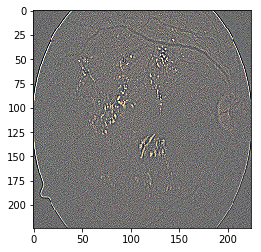

In [23]:
# Image after increasing sharpness only
plt.imshow(gamma_corrected)

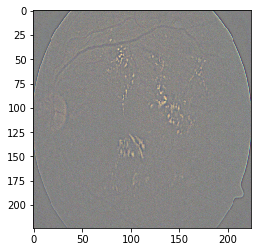

In [15]:
# Original Image
plt.imshow(img)

# Performing Augmentations and Image Processing and saving the image to disk

In [70]:
for j in range(0,772) :
    inputs= data_arr_copy[j]
    img = cv2.cvtColor(inputs, cv2.COLOR_BGR2RGB)
    #Incresing Brightness and Sharpness
    invGamma = 1.0 / 1.2
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    image=cv2.LUT(img, table) 

    #image = cv2.flip(image,0)
    output_filepath = 'C:/Users/KIIT/Images1/Severe/'+str(j)+'.png'
    
    

    cv2.imwrite(output_filepath,image)